# Cost Per Unit Predictor - Polynomial Regression
In this module, we will apply our concepts of polynomial regression that was introduced in the salary model and here develop a model that predicts cost vs. number of units sold. This is very much a key matter in <i>economies of scale</i>. The basic idea is that as we produce more units, the cost per unit will go down.

### Import Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
econ_df = pd.read_csv('EconomiesOfScale.csv')

## Exploratory Data Analysis (EDA)

In [3]:
econ_df.sample(5)

,Number of Units,Manufacturing Cost
336,3.938929,45.140841
835,5.664530,36.483292
886,6.021125,36.095333
33,1.987770,62.596005
70,2.565105,39.704978


In [4]:
econ_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of Units,1000.0,4.472799,1.336241,1.0,3.594214,4.435958,5.324780,10.0
Manufacturing Cost,1000.0,40.052999,10.595322,20.0,32.912036,38.345781,44.531822,100.0


In [5]:
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


### Visualizations

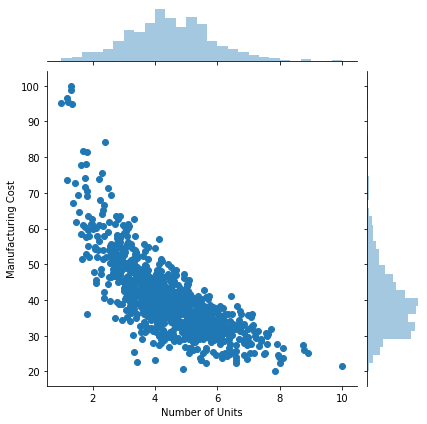

In [6]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data=econ_df)
plt.show()

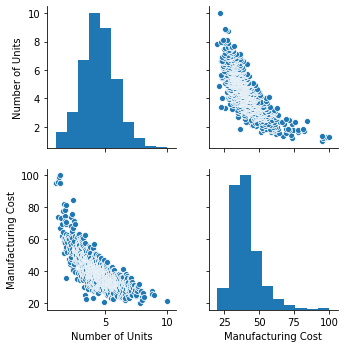

In [7]:
sns.pairplot(econ_df)
plt.show()

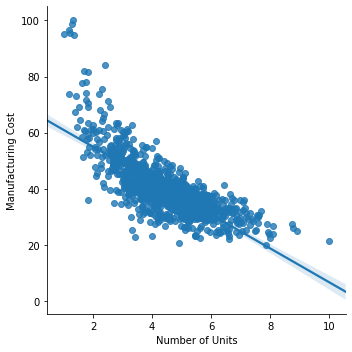

In [8]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=econ_df)
plt.show()

## Model Training and Testing

In [9]:
X = econ_df[['Number of Units']]
y = econ_df[['Manufacturing Cost']]
X_train = X
y_train = y

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_columns = poly_regressor.fit_transform(X_train)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = regressor.predict(X_columns)

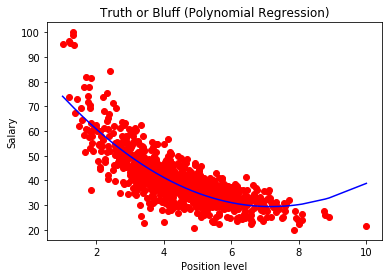

In [13]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred, color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Evaluation of our Regressor

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
mse = mean_squared_error(y_pred=y_pred, y_true=y_train)

print(f'MAE on test data is: {mae:2.3f}')
print(f'MSE on test data is: {mse:2.3f}')
print(f'RMSE on test data is: {sqrt(mse):2.3f}')

MAE on test data is: 4.539
MSE on test data is: 37.567
RMSE on test data is: 6.129


In [15]:
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = y_train

mpe = mean_percentage_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MPE on test data is: {mpe:2.2f} %')
print(f'MAPE on test data is: {mape:2.2f} %')

MPE on test data is: -2.05 %
MAPE on test data is: 11.64 %


In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred=regressor.predict(X_columns), y_true=y_train)
print(f'R^2 Score is: {r2:2.5f}')

R^2 Score is: 0.66503


In [17]:
def adjusted_r_squared(y_pred, y_true, data):
    from sklearn.metrics import r2_score
    r2 = r2_score(y_pred, y_true)
    adj_r2 = 1 - (1 - r2 ** 2) * ((data.shape[0] - 1) / (data.shape[0] - X_columns.shape[1] - 1))
    return adj_r2

adj_r2 = adjusted_r_squared(y_pred, y_train, econ_df)
print(f'Adjusted R^2 Score is: {adj_r2:2.5f}')

Adjusted R^2 Score is: 0.24404


# Statsmodels Package
The statsmodels package gives us a lot more information, including better criteria for evaluating our model.

In [52]:
import statsmodels.formula.api as smf

X = econ_df['Number of Units']
y = econ_df['Manufacturing Cost']

degree = 2

weights = np.polyfit(X, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(X)', data=econ_df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1981.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          2.96e-239
Time:                        20:22:25   Log-Likelihood:                -3232.0
No. Observations:                1000   AIC:                             6468.
Df Residuals:                     998   BIC:                             6478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.549e-14      0.920  -9.29e-14      1.000      -1.806       1.806
model(X)       1.0000      0.022     44.512      0.000       0.956       1.044
==============================================================================
Omnibus:                       78.768   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.851
Skew:                           0.279   Prob(JB):                     2.10e-65
Kurtosis:                       5.615   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""